In [1]:
# importing all the required librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head(2)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $


In [3]:
test = pd.read_csv('test.csv')
test.head(2)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,College/University,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,...,NaN,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Full-time schedules
1,105001,2004,0,2,College/University,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,...,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces


In [4]:
print('Shape of train data: ', df.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (105000, 34)
Shape of test data:  (42000, 33)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  42000 non-null  int64  
 1   year_of_poll        42000 non-null  int64  
 2   own_self_emp        42000 non-null  int64  
 3   veteran benefits    42000 non-null  int64  
 4   currently_enrolled  29387 non-null  object 
 5   race                42000 non-null  object 
 6   father_country      42000 non-null  object 
 7   educ                42000 non-null  object 
 8   house_stat          41997 non-null  object 
 9   major_ind_code      42000 non-null  object 
 10  labour_union        27663 non-null  object 
 11  self_country        42000 non-null  object 
 12  major_occ_code      20932 non-null  object 
 13  age                 41404 non-null  float64
 14  mother_country      42000 non-null  object 
 15  house_summary       42000 non-null  object 
 16  gend

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,105000.0,52499.500000,30311.033470,0.0,26249.75,52499.5,78749.25,104999.0
year_of_poll,105000.0,2004.500305,0.500002,2004.0,2004.00,2005.0,2005.00,2005.0
own_self_emp,105000.0,0.176800,0.555648,0.0,0.00,0.0,0.00,2.0
veteran benefits,105000.0,1.517305,0.850049,0.0,2.00,2.0,2.00,2.0
age,105000.0,36.243924,23.465922,0.0,16.00,35.0,52.00,94.0
gains,105000.0,488.464764,5284.877430,0.0,0.00,0.0,0.00,109998.9
dividends,105000.0,240.232046,2501.629980,0.0,0.00,0.0,0.00,119998.8
losses,105000.0,25.321047,186.824899,0.0,0.00,0.0,0.00,3225.6
employer_of,105000.0,1.953057,2.361890,0.0,0.00,1.0,4.00,6.0
weeks_worked,105000.0,20.898371,22.041670,0.0,0.00,7.0,47.00,47.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
currently_enrolled,73557,2,College/University,42386
race,105000,5,White,88078
father_country,105000,43,United-States,83720
educ,105000,17,High school graduate,25608
house_stat,104989,31,Householder,28081
major_ind_code,105000,24,Not in universe or children,53055
labour_union,69669,2,no,59270
self_country,105000,43,United-States,93022
major_occ_code,51945,14,Adm support including clerical,7708
mother_country,105000,43,United-States,84324


In [9]:
test.describe()

,ID,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
count,42000.000000,42000.000000,42000.000000,42000.000000,41404.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,128734.170476,2004.501929,0.171310,1.513595,36.637740,465.372364,241.543457,26.903100,1.965905,21.027476,93.935402
std,12521.134896,0.500002,0.547869,0.852014,23.111796,5015.810836,2333.333157,194.213523,2.370527,22.063297,454.946212
min,105000.000000,2004.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118499.750000,2004.000000,0.000000,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128999.500000,2005.000000,0.000000,2.000000,35.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
75%,139499.250000,2005.000000,0.000000,2.000000,52.000000,0.000000,0.000000,0.000000,4.000000,47.000000,0.000000
max,149999.000000,2005.000000,2.000000,2.000000,94.000000,109998.900000,119998.800000,3049.200000,6.000000,47.000000,15300.000000


In [10]:
test.describe(include='object')

,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,mother_country,...,hisp_origin,marriage_status,house_1yr_ago,income_filled,under18,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
count,29387,42000,42000,42000,41997,42000,27663,42000,20932,42000,...,42000,42000,20602,28992,11660,1285,42000,21023,42000,41432
unique,2,5,43,17,31,24,2,43,14,43,...,10,7,2,2,4,5,5,8,6,8
top,College/University,White,United-States,High school graduate,Householder,Not in universe or children,no,United-States,Adm support including clerical,United-States,...,All_Other,Unmarried,Yes,No,Both_Pr,Job loser_Other,NB_US,Pvt,Nonfiler,Children/Armed_Forces
freq,16959,35252,33550,10099,11171,21068,23421,37319,3166,33889,...,36241,18194,17267,22649,8225,441,37320,15269,15727,25659


In [11]:
nums = df.drop('ID',axis=1).select_dtypes(exclude='object').columns
obs = df.select_dtypes(include='object').columns

In [12]:
df.duplicated().sum()

0

In [13]:
df[nums].isnull().sum()

year_of_poll        0
own_self_emp        0
veteran benefits    0
age                 0
gains               0
dividends           0
losses              0
employer_of         0
weeks_worked        0
hourly_wage         0
dtype: int64

In [14]:
percent_missing = df[obs].isnull().sum() * 100 / len(df[obs])
missing_value_df = pd.DataFrame({'no_of_nan':df[obs].isnull().sum(),
    'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,no_of_nan,percent_missing
unemp_reason,101811,96.962857
under18,76016,72.396190
house_1yr_ago,53322,50.782857
major_occ_code,53055,50.528571
woker_type,52835,50.319048
labour_union,35331,33.648571
income_filled,32403,30.860000
currently_enrolled,31443,29.945714
full_partime_job,1392,1.325714
house_stat,11,0.010476


In [15]:
test[nums].isnull().sum()

year_of_poll          0
own_self_emp          0
veteran benefits      0
age                 596
gains                 0
dividends             0
losses                0
employer_of           0
weeks_worked          0
hourly_wage           0
dtype: int64

In [17]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_test = pd.DataFrame({'no_of_nan':test.isnull().sum(),
    'percent_missing': percent_missing})
missing_value_test.sort_values('percent_missing', ascending=False)

,no_of_nan,percent_missing
unemp_reason,40715,96.940476
under18,30340,72.238095
house_1yr_ago,21398,50.947619
major_occ_code,21068,50.161905
woker_type,20977,49.945238
labour_union,14337,34.135714
income_filled,13008,30.971429
currently_enrolled,12613,30.030952
age,596,1.419048
full_partime_job,568,1.352381


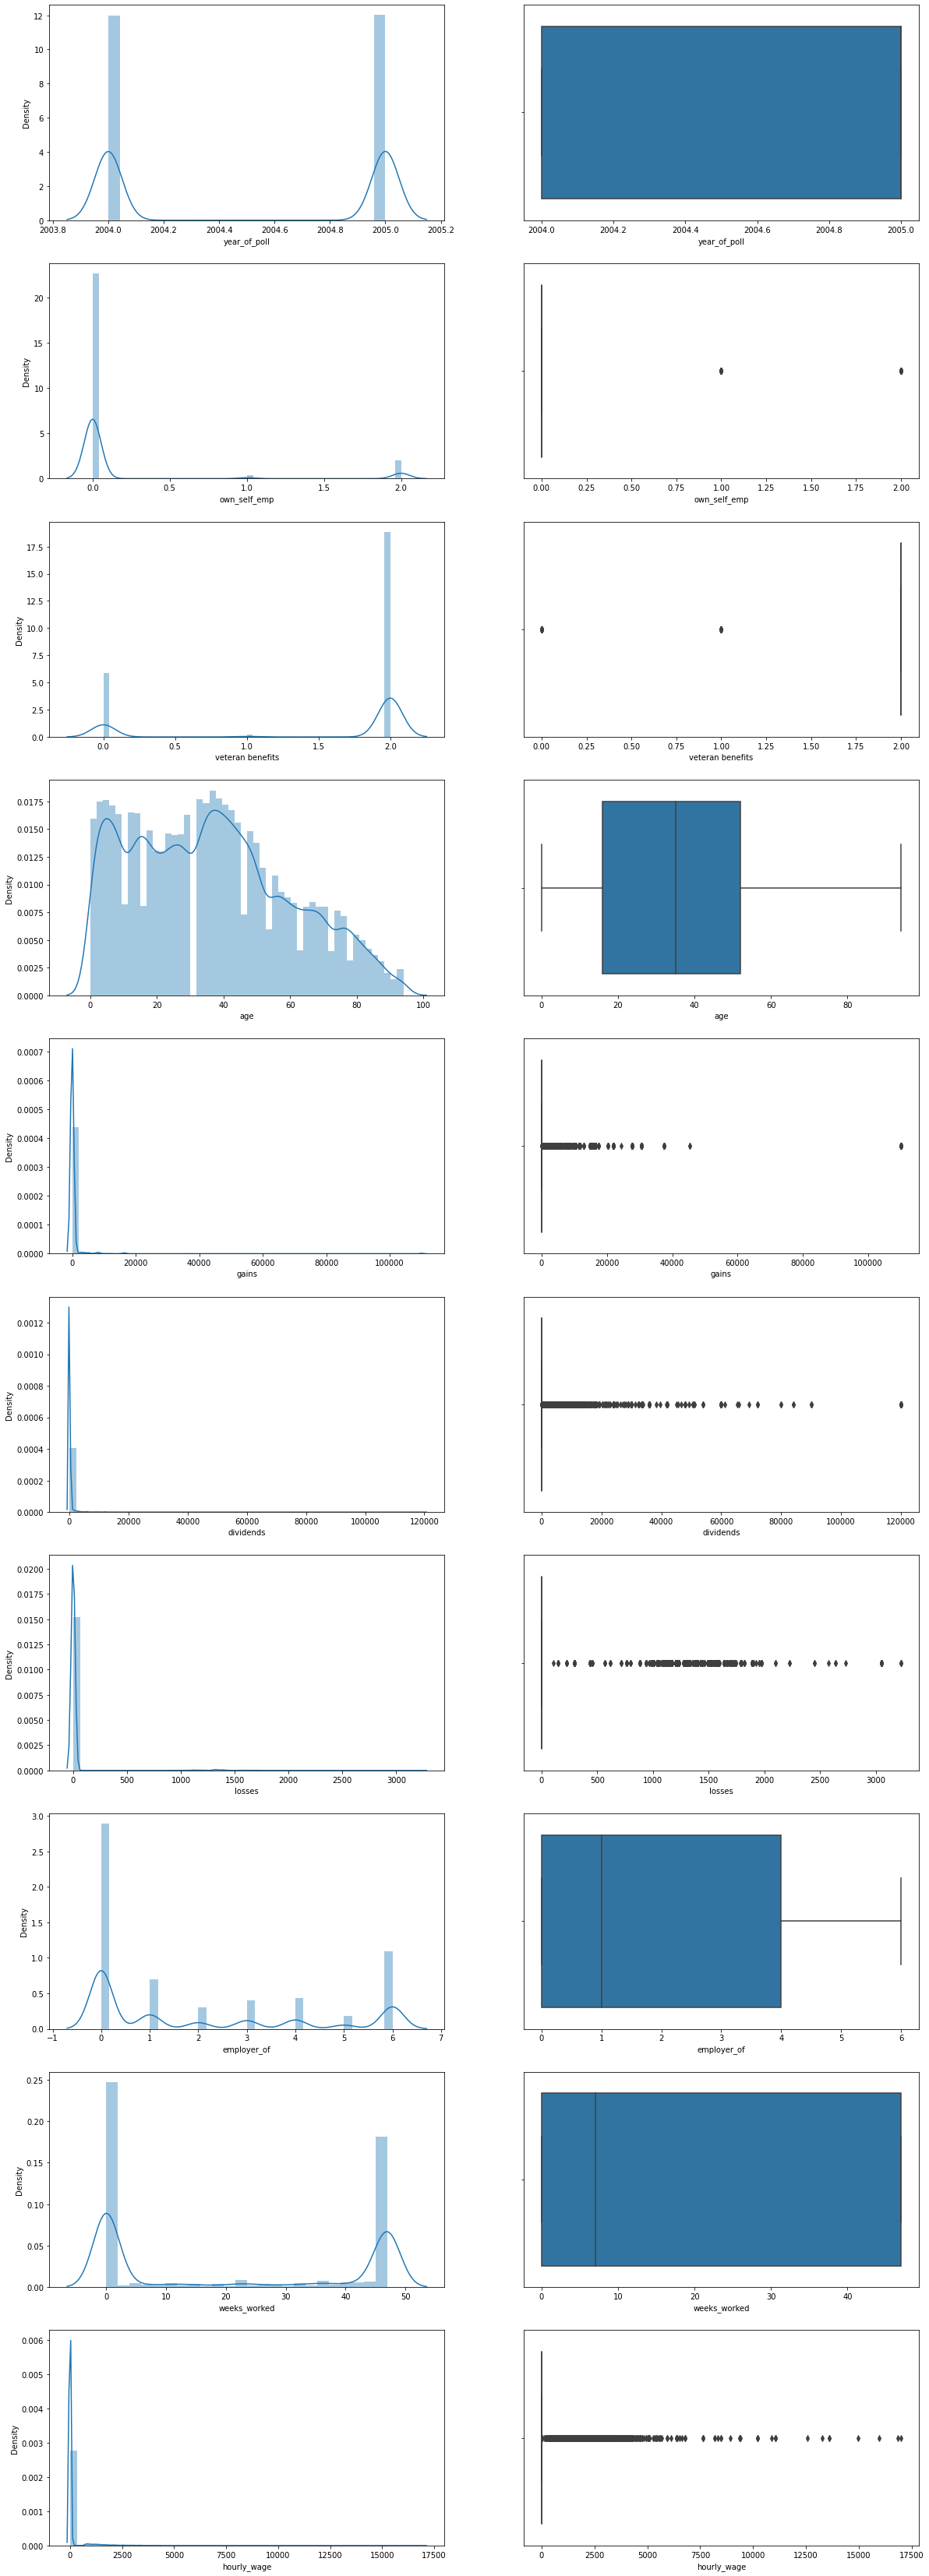

In [20]:
fig,axs = plt.subplots(nrows=len(nums),ncols=2, figsize=(20,60))
m=0
for feature in nums:
    sns.distplot(df[feature], kde=True, ax=axs[m][0])
    sns.boxplot(x=feature,data=df, ax=axs[m][1])
    m+=1
plt.show()

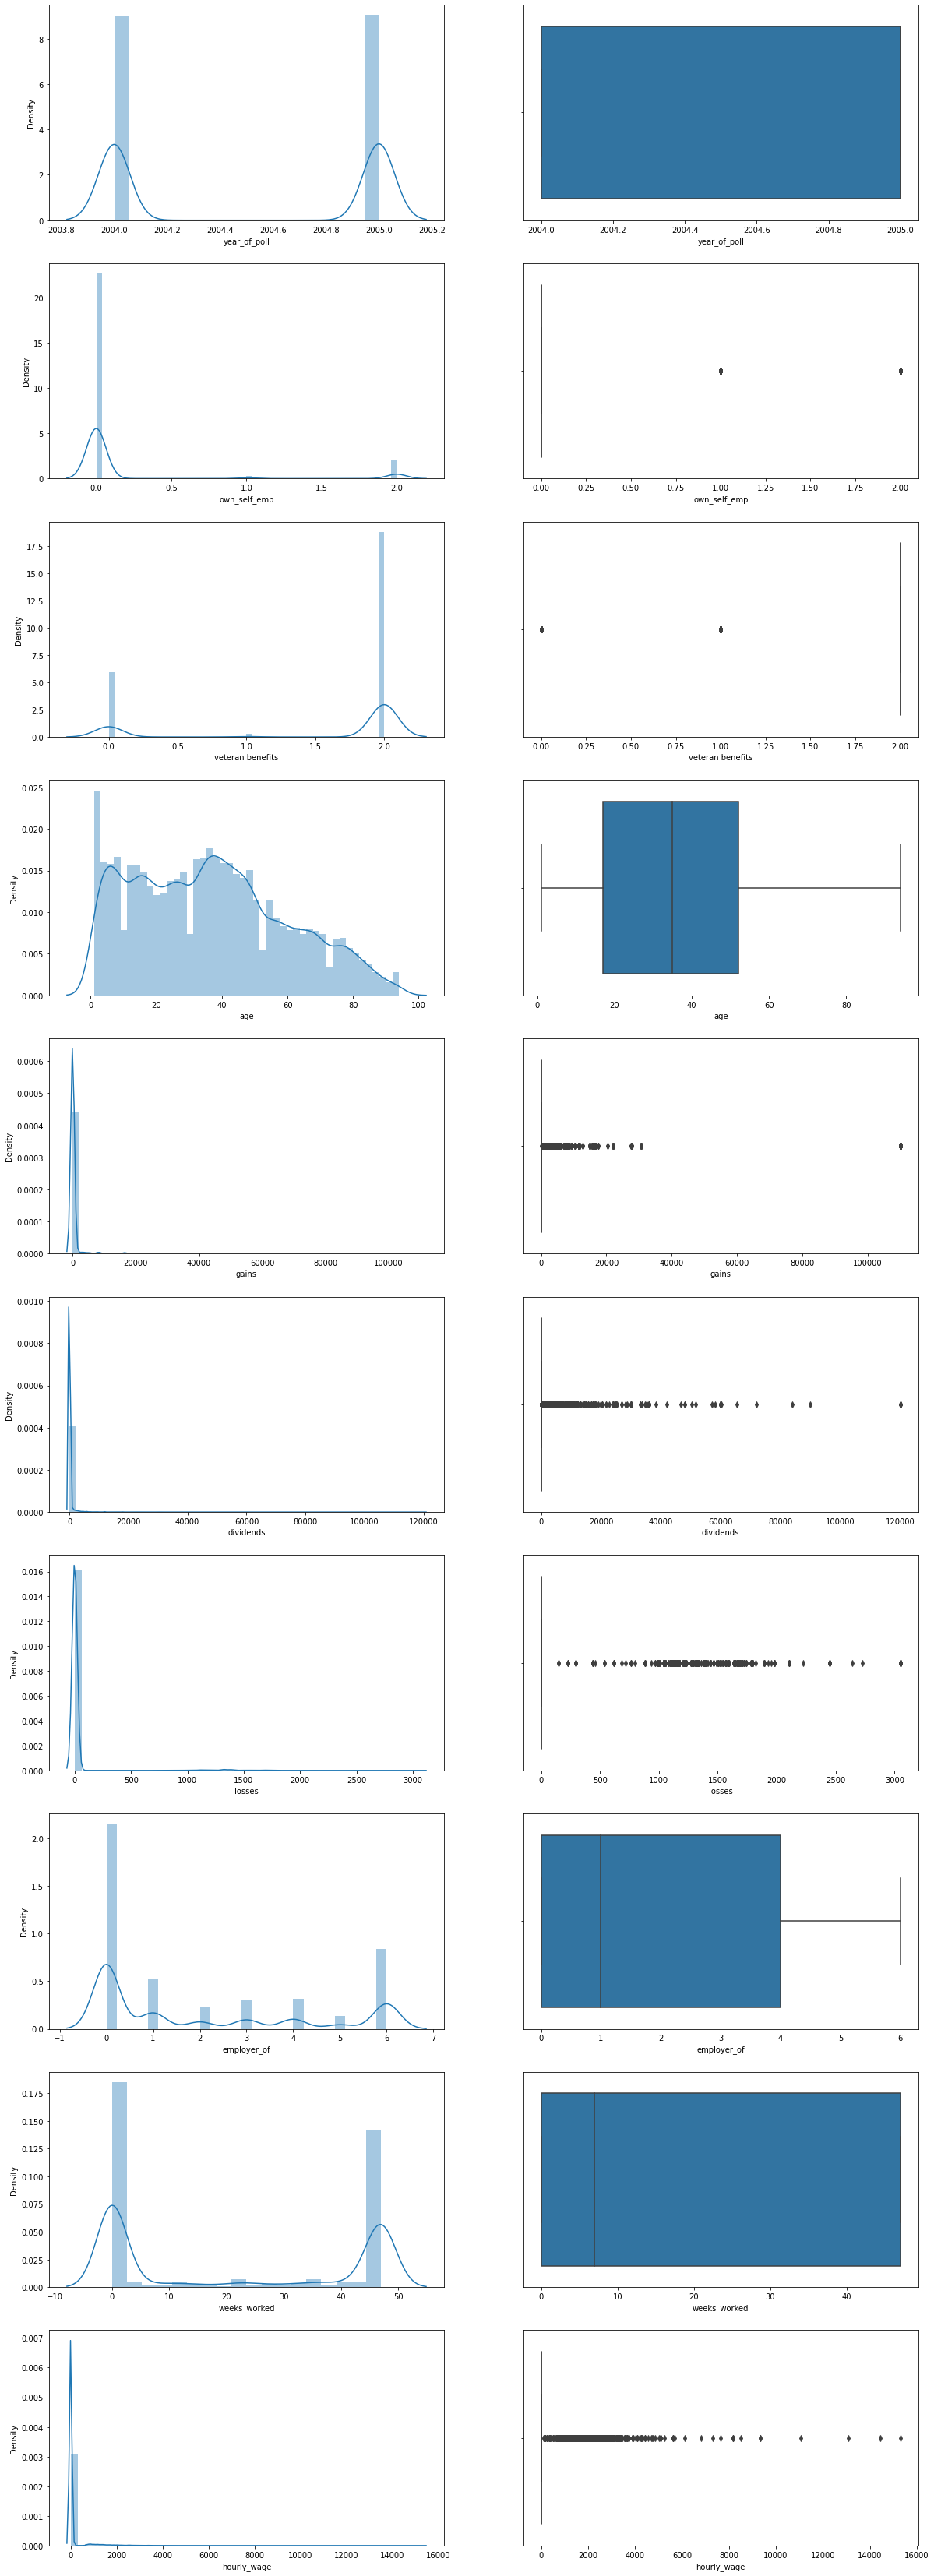

In [21]:
fig,axs = plt.subplots(nrows=len(nums),ncols=2, figsize=(20,60))
m=0
for feature in nums:
    sns.distplot(test[feature], kde=True, ax=axs[m][0])
    sns.boxplot(x=feature,data=test, ax=axs[m][1])
    m+=1
plt.show()

In [22]:
for column in obs:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CURRENTLY_ENROLLED :  2
 High school          31171
College/University    42386
Name: currently_enrolled, dtype: int64


RACE :  5
Amer/Indian/Aleut/Eskimo     1174
 Other                       1935
Asian/Pacific_Islander       3050
 Black                      10763
 White                      88078
Name: race, dtype: int64


FATHER_COUNTRY :  43
 Panama                             11
 Holand-Netherlands                 25
 Hong Kong                          52
 Trinadad&Tobago                    55
 Thailand                           55
 Outlying-U S (Guam USVI etc)       74
 Laos                               85
 Honduras                           99
 Taiwan                            100
 France                            100
 Cambodia                          109
 Iran                              113
 Yugoslavia                        124
 Scotland                          130
 Hungary                           149
 Greece                            172
 Peru                      

MOTHER_COUNTRY :  43
 Panama                             18
 Holand-Netherlands                 27
 Trinadad&Tobago                    49
 Hong Kong                          53
 Thailand                           65
 Outlying-U S (Guam USVI etc)       79
 Cambodia                           81
 Laos                               86
 Iran                               96
 Yugoslavia                        108
 Taiwan                            110
 France                            113
 Honduras                          117
 Greece                            122
 Scotland                          130
 Hungary                           157
 Portugal                          175
 Nicaragua                         182
 Peru                              187
 Haiti                             192
 Ecuador                           202
 Guatemala                         235
 Jamaica                           240
 Japan                             248
 Vietnam                           253
 Ind

In [24]:
for column in test.select_dtypes(include='object').columns:
    print(column.upper(),': ',test[column].nunique())
    print(test[column].value_counts().sort_values())
    print('\n')

CURRENTLY_ENROLLED :  2
 High school          12428
College/University    16959
Name: currently_enrolled, dtype: int64


RACE :  5
Amer/Indian/Aleut/Eskimo      472
 Other                        778
Asian/Pacific_Islander       1219
 Black                       4279
 White                      35252
Name: race, dtype: int64


FATHER_COUNTRY :  43
 Panama                              5
 Holand-Netherlands                 14
 Hong Kong                          22
 Laos                               24
 Trinadad&Tobago                    25
 Thailand                           29
 Outlying-U S (Guam USVI etc)       34
 France                             38
 Cambodia                           38
 Taiwan                             44
 Honduras                           45
 Yugoslavia                         48
 Scotland                           55
 Iran                               58
 Nicaragua                          67
 Greece                             68
 Ecuador                   

WOKER_TYPE :  8
 Without pay           38
 Never worked          91
Fed_Govt              617
Self_emp_inc          753
St_Govt               913
Loc_Govt             1611
Self_emp_not_inc     1731
Pvt                 15269
Name: woker_type, dtype: int64


FED_LIABILITY :  6
Joint_one_Under65_one_Above65      793
 Head of household                1527
Joint_both_Above65                1760
 Single                           7917
Joint_both_under65               14276
 Nonfiler                        15727
Name: fed_liability, dtype: int64


FULL_PARTIME_JOB :  8
 PT for econ reasons usually FT           87
 Unemployed part- time                   168
 PT for econ reasons usually PT          255
 Unemployed full-time                    477
 PT for non-econ reasons usually FT      677
 Not in labor force                     5528
 Full-time schedules                    8581
Children/Armed_Forces                  25659
Name: full_partime_job, dtype: int64




In [25]:
for feature in obs:
    df[feature]=df[feature].str.lstrip()
for feature in test.select_dtypes(include='object').columns:
    test[feature]=test[feature].str.lstrip()

<AxesSubplot:xlabel='count', ylabel='income'>

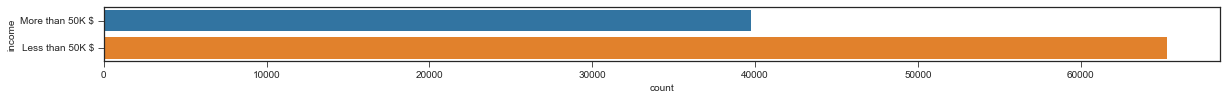

In [26]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=df)

In [27]:
df['educ'].replace('Less than 1st grade','dropout',inplace=True)
df['educ'].replace('1st 2nd 3rd or 4th grade','dropout',inplace=True)
df['educ'].replace('5th or 6th grade','dropout',inplace=True)
df['educ'].replace('12th grade no diploma','dropout',inplace=True)
df['educ'].replace('9th grade','dropout',inplace=True)
df['educ'].replace('11th grade','dropout',inplace=True)
df['educ'].replace('10th grade','dropout',inplace=True)
df['educ'].replace('7th and 8th grade','dropout',inplace=True)
df['educ'].replace('High school graduate','highGrad',inplace=True)
df['educ'].replace('Associates degree-academic program','college',inplace=True)
df['educ'].replace('Associates degree-occup /vocational','college',inplace=True)
df['educ'].replace('Some college but no degree','college',inplace=True)
df['educ'].replace('Bachelors degree(BA AB BS)','bachelors',inplace=True)
df['educ'].replace('Masters degree(MA MS MEng MEd MSW MBA)','masters',inplace=True)
df['educ'].replace('Doctorate degree(PhD EdD)','doctorate',inplace=True)
df['educ'].replace('Prof school degree (MD DDS DVM LLB JD)','prodegree',inplace=True)
df['educ'].replace('Children','children',inplace=True)

In [28]:
test['educ'].replace('Less than 1st grade','dropout',inplace=True)
test['educ'].replace('1st 2nd 3rd or 4th grade','dropout',inplace=True)
test['educ'].replace('5th or 6th grade','dropout',inplace=True)
test['educ'].replace('12th grade no diploma','dropout',inplace=True)
test['educ'].replace('9th grade','dropout',inplace=True)
test['educ'].replace('11th grade','dropout',inplace=True)
test['educ'].replace('10th grade','dropout',inplace=True)
test['educ'].replace('7th and 8th grade','dropout',inplace=True)
test['educ'].replace('High school graduate','highGrad',inplace=True)
test['educ'].replace('Associates degree-academic program','college',inplace=True)
test['educ'].replace('Associates degree-occup /vocational','college',inplace=True)
test['educ'].replace('Some college but no degree','college',inplace=True)
test['educ'].replace('Bachelors degree(BA AB BS)','bachelors',inplace=True)
test['educ'].replace('Masters degree(MA MS MEng MEd MSW MBA)','masters',inplace=True)
test['educ'].replace('Doctorate degree(PhD EdD)','doctorate',inplace=True)
test['educ'].replace('Prof school degree (MD DDS DVM LLB JD)','prodegree',inplace=True)
test['educ'].replace('Children','children',inplace=True)

<AxesSubplot:xlabel='count', ylabel='educ'>

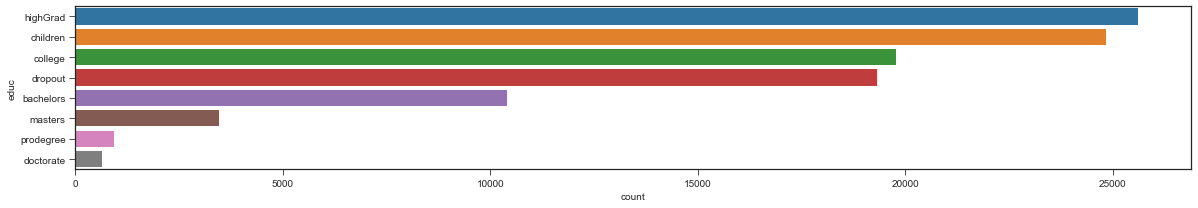

In [31]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="educ", data=df,order = df['educ'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='educ'>

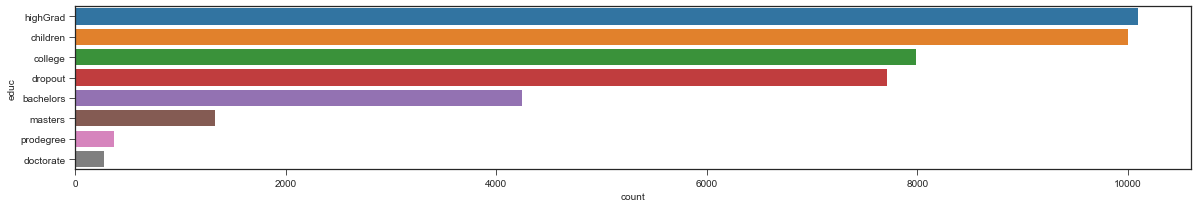

In [32]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="educ", data=test,order = test['educ'].value_counts().index)

In [33]:
df['hisp_origin'].replace('Do not know','NA_unkown',inplace=True)
df['hisp_origin'].replace('NA','NA_unkown',inplace=True)
df['hisp_origin'].value_counts()

All_Other                 90262
Mex_Amer                   4282
Mexican_Mexicano           3836
Central/South_American     2135
Puer_Ric                   1777
Other_Spanish              1316
NA_unkown                   638
Cuban                       601
Chicano                     153
Name: hisp_origin, dtype: int64

In [34]:
test['hisp_origin'].replace('Do not know','NA_unkown',inplace=True)
test['hisp_origin'].replace('NA','NA_unkown',inplace=True)
test['hisp_origin'].value_counts()

All_Other                 36241
Mex_Amer                   1700
Mexican_Mexicano           1522
Central/South_American      794
Puer_Ric                    674
Other_Spanish               551
NA_unkown                   229
Cuban                       221
Chicano                      68
Name: hisp_origin, dtype: int64

<AxesSubplot:xlabel='count', ylabel='hisp_origin'>

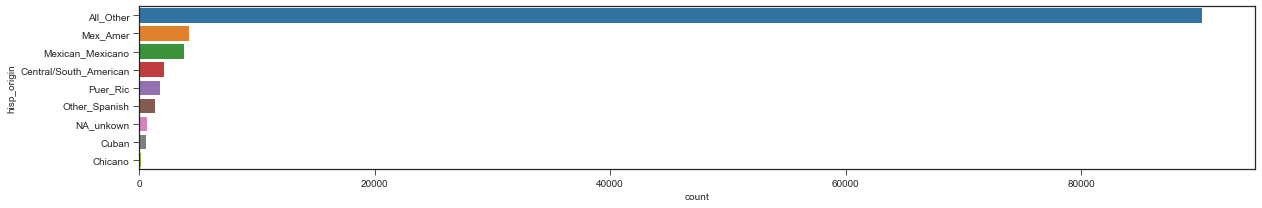

In [35]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="hisp_origin", data=df, order = df['hisp_origin'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='hisp_origin'>

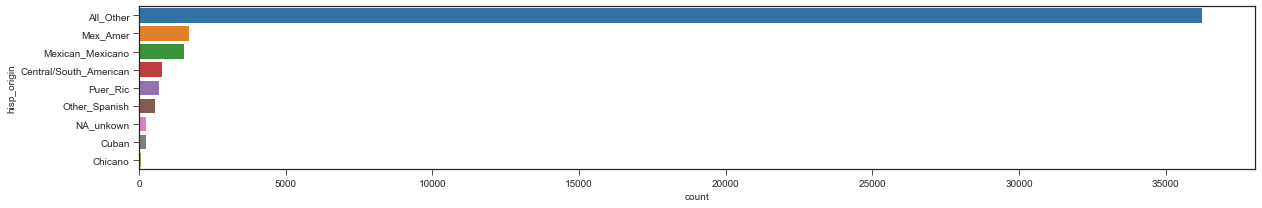

In [36]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="hisp_origin", data=test,order = test['hisp_origin'].value_counts().index)

In [37]:
df['marriage_status'].replace('Married_AF_Sp_Pr','married',inplace=True)
df['marriage_status'].replace('Married_civilian_Sp_Pr','married',inplace=True)
df['marriage_status'].replace('Married_Sp_Ab','not_married',inplace=True)
df['marriage_status'].replace('Unmarried','not_married',inplace=True)
df['marriage_status'].replace('Divorced','seperated',inplace=True)
df['marriage_status'].replace('Separated','seperated',inplace=True)
df['marriage_status'].replace('Widowed','not_married',inplace=True)

In [38]:
test['marriage_status'].replace('Married_AF_Sp_Pr','married',inplace=True)
test['marriage_status'].replace('Married_civilian_Sp_Pr','married',inplace=True)
test['marriage_status'].replace('Married_Sp_Ab','not_married',inplace=True)
test['marriage_status'].replace('Unmarried','not_married',inplace=True)
test['marriage_status'].replace('Divorced','seperated',inplace=True)
test['marriage_status'].replace('Separated','seperated',inplace=True)
test['marriage_status'].replace('Widowed','not_married',inplace=True)

In [39]:
df['house_stat'].replace(to_replace=['Child <18 ever marr not in subfamily','Child <18 ever marr RP of subfamily','Child <18 never marr not in subfamily','Child <18 never marr RP of subfamily','Child under 18 of RP of unrel subfamily'],
                          value='Child <18', inplace=True)
df['house_stat'].replace(to_replace=['Child 18+ ever marr Not in a subfamily','Child 18+ ever marr RP of subfamily','Child 18+ never marr Not in a subfamily','Child 18+ never marr RP of subfamily','Child 18+ spouse of subfamily RP'],
                          value='Child 18+', inplace=True)
df['house_stat'].replace(to_replace=['Grandchild <18 never marr child of subfamily RP','Grandchild <18 never marr not in subfamily'],
                          value='Grandchild <18', inplace=True)
df['house_stat'].replace(to_replace=['Grandchild 18+ ever marr not in subfamily','Grandchild 18+ ever marr RP of subfamily','Grandchild 18+ never marr not in subfamily','Grandchild 18+ spouse of subfamily RP'],
                          value='Grandchild 18+', inplace=True)
df['house_stat'].replace(to_replace=['Other Rel <18 never marr child of subfamily RP','Other Rel <18 never marr not in subfamily','Other Rel <18 never married RP of subfamily'],
                          value='Other Rel <18', inplace=True)
df['house_stat'].replace(to_replace=['Other Rel 18+ ever marr not in subfamily','Other Rel 18+ ever marr RP of subfamily','Other Rel 18+ never marr not in subfamily','Other Rel 18+ never marr RP of subfamily','Other Rel 18+ spouse of subfamily RP'],
                          value='Other Rel 18+', inplace=True)
df['house_stat'].value_counts()

Householder                            28081
Child <18                              26833
Spouse of householder                  21940
Nonfamily householder                  11728
Child 18+                               7589
Secondary individual                    3224
Other Rel 18+                           2665
Grandchild <18                          1522
Other Rel <18                            666
RP of unrelated subfamily                388
Grandchild 18+                           222
In group quarters                        108
Spouse of RP of unrelated subfamily       23
Name: house_stat, dtype: int64

In [40]:
test['house_stat'].replace(to_replace=['Child <18 ever marr not in subfamily','Child <18 ever marr RP of subfamily','Child <18 never marr not in subfamily','Child <18 never marr RP of subfamily','Child under 18 of RP of unrel subfamily'],
                          value='Child <18', inplace=True)
test['house_stat'].replace(to_replace=['Child 18+ ever marr Not in a subfamily','Child 18+ ever marr RP of subfamily','Child 18+ never marr Not in a subfamily','Child 18+ never marr RP of subfamily','Child 18+ spouse of subfamily RP'],
                          value='Child 18+', inplace=True)
test['house_stat'].replace(to_replace=['Grandchild <18 never marr child of subfamily RP','Grandchild <18 never marr not in subfamily'],
                          value='Grandchild <18', inplace=True)
test['house_stat'].replace(to_replace=['Grandchild 18+ ever marr not in subfamily','Grandchild 18+ ever marr RP of subfamily','Grandchild 18+ never marr not in subfamily','Grandchild 18+ spouse of subfamily RP'],
                          value='Grandchild 18+', inplace=True)
test['house_stat'].replace(to_replace=['Other Rel <18 never marr child of subfamily RP','Other Rel <18 never marr not in subfamily','Other Rel <18 never married RP of subfamily'],
                          value='Other Rel <18', inplace=True)
test['house_stat'].replace(to_replace=['Other Rel 18+ ever marr not in subfamily','Other Rel 18+ ever marr RP of subfamily','Other Rel 18+ never marr not in subfamily','Other Rel 18+ never marr RP of subfamily','Other Rel 18+ spouse of subfamily RP'],
                          value='Other Rel 18+', inplace=True)
test['house_stat'].value_counts()

Householder                            11171
Child <18                              10794
Spouse of householder                   8772
Nonfamily householder                   4680
Child 18+                               3112
Secondary individual                    1259
Other Rel 18+                           1058
Grandchild <18                           618
Other Rel <18                            261
RP of unrelated subfamily                128
Grandchild 18+                            85
In group quarters                         42
Spouse of RP of unrelated subfamily       17
Name: house_stat, dtype: int64

In [41]:
country = df[(df['self_country']!='United-States')&(df['self_country']!='Mexico')]['self_country'].values
country

array(['Germany', 'Puerto-Rico', 'Philippines', ..., '?', '?', '?'],
      dtype=object)

In [42]:
df['self_country'].replace(to_replace=country, value='OtherCountry', inplace=True)
df['mother_country'].replace(to_replace=country, value='OtherCountry', inplace=True)
df['father_country'].replace(to_replace=country, value='OtherCountry', inplace=True)
test['self_country'].replace(to_replace=country, value='OtherCountry', inplace=True)
test['mother_country'].replace(to_replace=country, value='OtherCountry', inplace=True)
test['father_country'].replace(to_replace=country, value='OtherCountry', inplace=True)

In [43]:
df[(df['house_stat'].isnull())&(df['age']<=18)].fillna('Child <18',inplace=True)
df[(df['house_stat'].isnull())&(df['age']==27)].fillna('Householder',inplace=True)
df['house_stat'].fillna('Child 18+',inplace=True)

In [53]:
test['house_stat'].fillna('Child <18',inplace=True)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job


In [54]:
df['full_partime_job'].fillna(value='Children/Armed_Forces', inplace=True)
df['full_partime_job'].isna().sum()

0

In [59]:
test['age'].fillna(16,inplace=True)

In [64]:
test['full_partime_job'].fillna(value='Children/Armed_Forces', inplace=True)
test['full_partime_job'].isna().sum()

0

In [65]:
df['currently_enrolled'].fillna(value='Not Enrolled',inplace=True)
df['currently_enrolled'].value_counts()

College/University    42386
Not Enrolled          31443
High school           31171
Name: currently_enrolled, dtype: int64

In [68]:
test['currently_enrolled'].fillna(value='Not Enrolled',inplace=True)
test['currently_enrolled'].value_counts()

College/University    16959
Not Enrolled          12613
High school           12428
Name: currently_enrolled, dtype: int64

In [69]:
df['income_filled'].fillna(value='No',inplace=True)
df['income_filled'].isnull().sum()

0

In [70]:
test['income_filled'].fillna(value='No',inplace=True)
test['income_filled'].isnull().sum()

0

In [71]:
df['labour_union'].fillna(value='no',inplace=True)
test['labour_union'].fillna(value='no',inplace=True)

In [72]:
ind_list = df[(df['age']>0)&(df['age']<16)]['woker_type'].index
df['woker_type'].iloc[ind_list]='Never worked'
df['woker_type'].fillna(value='Pvt',inplace=True)
df['woker_type'].isnull().sum()

0

In [76]:
ind_list = test[(test['age']>0)&(test['age']<16)]['woker_type'].index
test['woker_type'].iloc[ind_list]='Never worked'
test['woker_type'].fillna(value='Pvt',inplace=True)
test['woker_type'].isnull().sum()

0

In [77]:
df['major_occ_code'].fillna('Not in universe or children',inplace=True)
df['house_1yr_ago'].fillna(value='Yes',inplace=True)

In [83]:
test['major_occ_code'].fillna('Not in universe or children',inplace=True)
test['house_1yr_ago'].fillna(value='Yes',inplace=True)

In [84]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_test = pd.DataFrame({'no_of_nan':test.isnull().sum(),
    'percent_missing': percent_missing})
missing_value_test.sort_values('percent_missing', ascending=False)

,no_of_nan,percent_missing
unemp_reason,40715,96.940476
under18,30340,72.238095
ID,0,0.000000
hisp_origin,0,0.000000
fed_liability,0,0.000000
woker_type,0,0.000000
citizenship,0,0.000000
hourly_wage,0,0.000000
weeks_worked,0,0.000000
income_filled,0,0.000000


In [88]:
for column_name in df[nums].columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  year_of_poll  is :  0
Count of zeros in column  own_self_emp  is :  95004
Count of zeros in column  veteran benefits  is :  24826
Count of zeros in column  age  is :  0
Count of zeros in column  gains  is :  101128
Count of zeros in column  dividends  is :  93914
Count of zeros in column  losses  is :  102994
Count of zeros in column  employer_of  is :  50546
Count of zeros in column  weeks_worked  is :  50546
Count of zeros in column  hourly_wage  is :  99074


In [86]:
ind_list=df[(df['age']==0)&(df['house_summary']=='Child_U18_Unmarried')].index
df['age'].iloc[ind_list]=15

In [87]:
df['age'].replace(0,df['age'].median(),inplace=True)

In [89]:
df_clean=df.drop(['unemp_reason','under18'],axis=1)

In [90]:
test_clean=test.drop(['unemp_reason','under18'],axis=1)

In [91]:
df_clean.to_csv('df_clean.csv')
test_clean.to_csv('test_clean.csv')

In [93]:
df_clean.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,0,1,2,3,4,5,6,7,8,9
year_of_poll,2004,2005,2004,2004,2004,2004,2005,2004,2005,2005
own_self_emp,0,0,0,0,0,0,0,0,0,0
veteran benefits,2,0,2,2,2,0,2,2,2,2
currently_enrolled,High school,College/University,Not Enrolled,College/University,Not Enrolled,Not Enrolled,College/University,High school,College/University,High school
race,White,White,White,Amer/Indian/Aleut/Eskimo,White,White,White,White,White,White
father_country,United-States,OtherCountry,United-States,United-States,United-States,Mexico,United-States,United-States,United-States,OtherCountry
educ,college,children,college,highGrad,highGrad,children,college,highGrad,dropout,college
house_stat,Householder,Child <18,Secondary individual,Householder,Householder,Child <18,Child 18+,Spouse of householder,Householder,Spouse of householder
major_ind_code,Business and repair services,Not in universe or children,Manufacturing-durable goods,Wholesale trade,Wholesale trade,Not in universe or children,Entertainment,Construction,Business and repair services,Not in universe or children


In [99]:
df_clean['major_ind_code'].replace(to_replace=['Retail trade','Finance insurance and real estate','Wholesale trade'],value='fin_trade',inplace=True)
df_clean['major_ind_code'].replace(to_replace=['Manufacturing-durable goods','Manufacturing-nondurable goods','Business and repair services','Construction','Forestry and fisheries','Mining'],value='manufacturing',inplace=True)
df_clean['major_ind_code'].replace(to_replace=['Education','Public administration','Communications','Social services','Transportation'],value='edu-social',inplace=True)
df_clean['major_ind_code'].replace(to_replace=['Other professional services','Armed Forces','Agriculture','Entertainment','Private household services','Personal services except private HH'],value='other_ind',inplace=True)
df_clean['major_ind_code'].replace(to_replace=['Medical except hospital','Hospital services','Utilities and sanitary services'],value='medical',inplace=True)

In [102]:
test_clean['major_ind_code'].replace(to_replace=['Retail trade','Finance insurance and real estate','Wholesale trade'],value='fin_trade',inplace=True)
test_clean['major_ind_code'].replace(to_replace=['Manufacturing-durable goods','Manufacturing-nondurable goods','Business and repair services','Construction','Forestry and fisheries','Mining'],value='manufacturing',inplace=True)
test_clean['major_ind_code'].replace(to_replace=['Education','Public administration','Communications','Social services','Transportation'],value='edu-social',inplace=True)
test_clean['major_ind_code'].replace(to_replace=['Other professional services','Armed Forces','Agriculture','Entertainment','Private household services','Personal services except private HH'],value='other_ind',inplace=True)
test_clean['major_ind_code'].replace(to_replace=['Medical except hospital','Hospital services','Utilities and sanitary services'],value='medical',inplace=True)

In [108]:
df_clean['major_occ_code'].replace(to_replace=['Armed Forces','Private household services','Protective services','Other service'],value='armed_services',inplace=True)
df_clean['major_occ_code'].replace(to_replace=['Sales','Executive admin and managerial','Adm support including clerical','Professional specialty'],value='sales_exec',inplace=True)
df_clean['major_occ_code'].replace(to_replace=['Precision production craft & repair','Machine operators assmblrs & inspctrs','Handlers equip cleaners etc','Handlers equip cleaners etc ','Transportation and material moving','Farming forestry and fishing','Technicians and related support'],value='tech_manu',inplace=True)

In [110]:
test_clean['major_occ_code'].replace(to_replace=['Armed Forces','Private household services','Protective services','Other service'],value='armed_services',inplace=True)
test_clean['major_occ_code'].replace(to_replace=['Sales','Executive admin and managerial','Adm support including clerical','Professional specialty'],value='sales_exec',inplace=True)
test_clean['major_occ_code'].replace(to_replace=['Precision production craft & repair','Machine operators assmblrs & inspctrs','Handlers equip cleaners etc','Handlers equip cleaners etc ','Transportation and material moving','Farming forestry and fishing','Technicians and related support'],value='tech_manu',inplace=True)

In [119]:
for column in test_clean.select_dtypes(include='object').columns:
    print(column.upper(),': ',test_clean[column].nunique())
    print(test_clean[column].value_counts().sort_values())
    print('\n')

CURRENTLY_ENROLLED :  3
High school           12428
Not Enrolled          12613
College/University    16959
Name: currently_enrolled, dtype: int64


RACE :  5
Amer/Indian/Aleut/Eskimo      472
Other                         778
Asian/Pacific_Islander       1219
Black                        4279
White                       35252
Name: race, dtype: int64


FATHER_COUNTRY :  3
Mexico            2107
OtherCountry      6343
United-States    33550
Name: father_country, dtype: int64


EDUC :  8
doctorate      268
prodegree      367
masters       1323
bachelors     4246
dropout       7709
college       7987
children     10001
highGrad     10099
Name: educ, dtype: int64


HOUSE_STAT :  13
Spouse of RP of unrelated subfamily       17
In group quarters                         42
Grandchild 18+                            85
RP of unrelated subfamily                128
Other Rel <18                            261
Grandchild <18                           618
Other Rel 18+                           10

In [120]:
for column in df_clean.select_dtypes(include='object').columns:
    print(column.upper(),': ',df_clean[column].nunique())
    print(df_clean[column].value_counts().sort_values())
    print('\n')

CURRENTLY_ENROLLED :  3
High school           31171
Not Enrolled          31443
College/University    42386
Name: currently_enrolled, dtype: int64


RACE :  5
Amer/Indian/Aleut/Eskimo     1174
Other                        1935
Asian/Pacific_Islander       3050
Black                       10763
White                       88078
Name: race, dtype: int64


FATHER_COUNTRY :  3
Mexico            5297
OtherCountry     15983
United-States    83720
Name: father_country, dtype: int64


EDUC :  8
doctorate      651
prodegree      937
masters       3471
bachelors    10403
dropout      19316
college      19783
children     24831
highGrad     25608
Name: educ, dtype: int64


HOUSE_STAT :  13
Spouse of RP of unrelated subfamily       23
In group quarters                        108
Grandchild 18+                           222
RP of unrelated subfamily                388
Other Rel <18                            666
Grandchild <18                          1522
Other Rel 18+                           26

In [121]:
df_clean['income'].replace('Less than 50K $',1,inplace=True)
df_clean['income'].replace('More than 50K $',0,inplace=True)

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  42000 non-null  int64  
 1   year_of_poll        42000 non-null  int64  
 2   own_self_emp        42000 non-null  int64  
 3   veteran benefits    42000 non-null  int64  
 4   currently_enrolled  42000 non-null  object 
 5   race                42000 non-null  object 
 6   father_country      42000 non-null  object 
 7   educ                42000 non-null  object 
 8   house_stat          42000 non-null  object 
 9   major_ind_code      42000 non-null  object 
 10  labour_union        42000 non-null  object 
 11  self_country        42000 non-null  object 
 12  major_occ_code      42000 non-null  object 
 13  age                 42000 non-null  float64
 14  mother_country      42000 non-null  object 
 15  house_summary       42000 non-null  object 
 16  gend

In [125]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  42000 non-null  int64  
 1   year_of_poll        42000 non-null  int64  
 2   own_self_emp        42000 non-null  int64  
 3   veteran benefits    42000 non-null  int64  
 4   currently_enrolled  42000 non-null  object 
 5   race                42000 non-null  object 
 6   father_country      42000 non-null  object 
 7   educ                42000 non-null  object 
 8   house_stat          42000 non-null  object 
 9   major_ind_code      42000 non-null  object 
 10  labour_union        42000 non-null  object 
 11  self_country        42000 non-null  object 
 12  major_occ_code      42000 non-null  object 
 13  age                 42000 non-null  float64
 14  mother_country      42000 non-null  object 
 15  house_summary       42000 non-null  object 
 16  gend

In [127]:
obs = df_clean.select_dtypes(include='object').columns
obs

Index(['currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'marriage_status', 'house_1yr_ago', 'income_filled', 'citizenship',
       'woker_type', 'fed_liability', 'full_partime_job'],
      dtype='object')

In [128]:
labelen = LabelEncoder()
for feature in obs:
    df_clean[feature]=labelen.fit_transform(df_clean[feature])
df_clean.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
year_of_poll,2004.0,2005.0,2004.0,2004.0,2004.0
own_self_emp,0.0,0.0,0.0,0.0,0.0
veteran benefits,2.0,0.0,2.0,2.0,2.0
currently_enrolled,1.0,0.0,2.0,0.0,2.0
race,4.0,4.0,4.0,0.0,4.0
father_country,2.0,1.0,2.0,2.0,2.0
educ,2.0,1.0,2.0,5.0,5.0
house_stat,4.0,1.0,10.0,4.0,4.0
major_ind_code,3.0,0.0,3.0,2.0,2.0


In [130]:
for feature in obs:
    test_clean[feature]=labelen.fit_transform(test_clean[feature])
test_clean.head().T

,0,1,2,3,4
ID,105000.0,105001.0,105002.0,105003.0,105004.0
year_of_poll,2005.0,2004.0,2004.0,2004.0,2004.0
own_self_emp,0.0,0.0,0.0,2.0,0.0
veteran benefits,2.0,2.0,2.0,2.0,2.0
currently_enrolled,0.0,0.0,2.0,2.0,2.0
race,4.0,4.0,4.0,4.0,4.0
father_country,2.0,2.0,2.0,2.0,1.0
educ,2.0,0.0,4.0,5.0,3.0
house_stat,4.0,6.0,5.0,10.0,4.0
major_ind_code,3.0,4.0,0.0,3.0,1.0


In [132]:
X = df_clean.drop(['ID','income'],axis=1)
y = df_clean[['income']]
X.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,hourly_wage,citizenship,woker_type,fed_liability,full_partime_job
0,2004,0,2,1,4,2,2,4,3,0,...,0.0,1,0,0,47,0.0,3,3,2,0
1,2005,0,0,0,4,1,1,1,0,0,...,0.0,0,1,0,0,0.0,3,2,4,0
2,2004,0,2,2,4,2,2,10,3,0,...,0.0,6,0,1,47,0.0,3,3,5,0
3,2004,0,2,0,0,2,5,4,2,0,...,0.0,2,1,0,47,0.0,3,3,2,0
4,2004,0,2,2,4,2,5,4,2,0,...,0.0,3,1,0,47,0.0,3,3,5,0


In [133]:
y.value_counts(normalize=True)

income
1         0.621638
0         0.378362
dtype: float64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [136]:
sc = StandardScaler()
Xs_train = sc.fit_transform(X_train)
Xs_test = sc.transform(X_test)
Xs_train

array([[-1.00177027, -0.31623579, -1.78359324, ..., -0.88339003,
         0.56431003, -0.57387849],
       [ 0.99823285, -0.31623579,  0.56827126, ...,  0.19395064,
         0.56431003,  1.10359492],
       [-1.00177027, -0.31623579, -1.78359324, ..., -0.88339003,
         0.56431003, -0.57387849],
       ...,
       [-1.00177027, -0.31623579, -1.78359324, ..., -0.88339003,
         0.56431003, -0.57387849],
       [-1.00177027, -0.31623579, -1.78359324, ..., -0.88339003,
         0.56431003, -0.57387849],
       [ 0.99823285,  3.30309315,  0.56827126, ...,  0.19395064,
        -2.32228674,  4.45854173]])

In [150]:
lgbm = lgb.LGBMClassifier()

In [208]:
lgbm_tune = lgb.LGBMClassifier(boosting_type='gbdt',
                          learning_rate=0.01, 
                          num_leaves=7, 
                          n_estimators=10000,
                          num_iterations=4770)

In [151]:
lgbm.fit(X_train, y_train)
y_train_pred_lg = lgbm.predict(X_train)
y_test_pred_lg = lgbm.predict(X_test)
lg_test_acc=lgbm.score(X_test,y_test) 
lg_test_acc

0.6506031746031746

In [209]:
lgbm_tune.fit(X_train, y_train)
y_train_pred_lg = lgbm_tune.predict(X_train)
y_test_pred_lg = lgbm_tune.predict(X_test)
lg_test_acc=lgbm_tune.score(X_test,y_test) 
lg_test_acc

0.6516507936507937

In [210]:
lgbm_tune.fit(X, y)
y_train_pred_lg = lgbm_tune.predict(X)
y_test_pred_lg = lgbm_tune.predict(X)
lg_test_acc=lgbm_tune.score(X,y) 
lg_test_acc

0.655647619047619

In [211]:
test_file_ids = test_clean['ID']
test_clean=test_clean.drop('ID',axis = 1)

In [212]:
# trial 12
final_predictions = lgbm_tune.predict(test_clean)
submission12=pd.DataFrame([test_file_ids,final_predictions]).T
submission12.rename(columns={"Unnamed 0": "income"},inplace=True)
submission12.to_csv('submission12.csv',index = False)

In [225]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print("\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",classification_report(y_test,y_pred))


Accuracy is  61.13968253968254 

Precision Value is
               precision    recall  f1-score   support

           0       0.48      0.26      0.34     11931
           1       0.65      0.82      0.72     19569

    accuracy                           0.61     31500
   macro avg       0.56      0.54      0.53     31500
weighted avg       0.58      0.61      0.58     31500



In [ ]:
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)